## Data Understanding

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
%matplotlib inline

In [2]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('C:\\Users\\garro\\Desktop\\Data Mining\\DatasetProject1\\Train_HR_Employee_Attrition.csv')

# Get a quick overview of what we are dealing with in our dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [3]:
for BusinessTravel in df:
    print(df[BusinessTravel].unique())

[52. 36. nan 33. 35. 27. 37. 42. 23. 20. 30. 28. 39. 59. 34. 38. 51. 31.
 40. 46. 48. 50. 55. 45. 47. 29. 24. 41. 43. 58. 44. 60. 53. 56. 49. 25.
 21. 32. 54. 19. 26. 18. 57. 22.]
['No' 'Yes']
['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']
[ 593 1218  530  953 1380  693 1401  326  145 1410 1240  916  194 1093
  933 1465 1354  849  571 1333  625 1242 1154  119 1144  309 1434  285
  192  452 1219 1272 1141  506  287 1017 1213  750 1383  444  532 1157
  360  480  335  857 1018 1319 1391  664  580  552 1332  804  976  153
 1195  594  216  334  935 1297  759 1373  772 1062  329  185 1377  823
 1398  405  408 1092 1320 1322 1312  957  603  136  581  869  775  658
 1294  895 1456 1050 1229 1086  529  920  977  888 1351 1117 1372  286
  142 1283  381  558 1045 1454  604 1342  501  840 1239  182  950  855
  412  369 1323 1153  992  515  325  143  694  193 1070 1176 1280  469
  277  819 1315  676 1184  653 1277  798 1488  585 1313 1411  180  607
  299  583  598  818  903 1288  836  975  

In [4]:
# The dataset contains 33 columns and 1176 observations
df.shape

(1176, 33)

In [5]:
# Check Null variables, given attribute
df.isnull().sum()
# 8 Attributes have Null values, I will replace them with an appropriate value for creating a model in next steps 

Age                         176
Attrition                     0
BusinessTravel              107
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       59
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               213
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      372
OverTime                      0
PercentSalaryHike             0
PerformanceRating           138
RelationshipSatisfaction      0
StandardHours               570
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       233
WorkLifeBalance               0
YearsAtCompany               60
YearsInCurrentRole            0
YearsSin

In [6]:
# Medium value of "Monthly Income", will be used to replace NaN values in the dataframe
print(df["MonthlyIncome"].mean())

6565.946002076843


In [7]:
#Replacing Nan values for the attribute "MonthlyIncome"
df['MonthlyIncome'] = df['MonthlyIncome'].replace(np.nan, 6565.946002076843)

In [8]:
print((df['MonthlyIncome']),print(df['Age']))

0       52.0
1       36.0
2        NaN
3       33.0
4        NaN
        ... 
1171    37.0
1172    33.0
1173    33.0
1174    45.0
1175    48.0
Name: Age, Length: 1176, dtype: float64
0        8446.0
1        4834.0
2        4768.0
3        2799.0
4        7978.0
         ...   
1171     2115.0
1172     5147.0
1173     2500.0
1174     4385.0
1175    17174.0
Name: MonthlyIncome, Length: 1176, dtype: float64 None


In [9]:
# Check if values have been replaced ----> yes, no more nan values
df['MonthlyIncome'].isnull().sum()

0

In [19]:
# Replacing values in order to have only numerical 
# If Over 18 = 1 otherwise = 0
# If Non travel = 0, Travel_Rarely = 1, Travel_Frequently = 2
# If Male = 0 if Female = 1
df["Over18"].replace(['Yes'], '1', inplace=True)
df["Over18"].replace(['No'], '0', inplace=True)
df["BusinessTravel"].replace(['Travel_Rarely'], '1', inplace=True)
df["BusinessTravel"].replace([ 'Travel_Frequently'], '2', inplace=True)
df["BusinessTravel"].replace(['Non-Travel'], '0', inplace=True)
df["Gender"].replace(['Male'], '0', inplace=True)
df["Gender"].replace(['Female'], '1', inplace=True)


In [20]:
# Will create substitute values for the remaining attributes with missing values
print(df["Age"].mean(), "AGE")
print(df["BusinessTravel"].mode(), "BusinessTravel")
print(df["Over18"].mode(), "Over18")
print(df["StandardHours"].mean(), "StandardHours")
print(df["PerformanceRating"].mean(), "PerformanceRating")
print(df["TrainingTimesLastYear"].mean(), "TrainingTimes")
print(df["YearsAtCompany"].mean(), "YearsAtCompany")
print(df["Gender"].mode(), "Gender")



37.16921768707483 AGE
0    1
dtype: object BusinessTravel
0    1
dtype: object Over18
80.0 StandardHours
3.1343537414965987 PerformanceRating
2.8613945578231292 TrainingTimes
6.930272108843537 YearsAtCompany
0    0
dtype: object Gender


In [21]:
df['Age'] = df['Age'].replace(np.nan, 37.0)
for column in df.columns:
    df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0], inplace=True)
for column in df.columns:
    df["Over18"].fillna(df['Over18'].mode()[0], inplace=True)
for column in df.columns:
    df["Gender"].fillna(df['Gender'].mode()[0], inplace=True)
df['StandardHours'] = df['StandardHours'].replace(np.nan, 80.0)
df['PerformanceRating'] = df['PerformanceRating'].replace(np.nan, 3.0)
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].replace(np.nan, 3.0)
df['YearsAtCompany'] = df['YearsAtCompany'].replace(np.nan, 7.0)

In [22]:
# No Null variable in any of the columns
print(df["Age"].isnull().sum())
print(df["BusinessTravel"].isnull().sum())
print(df["Over18"].isnull().sum())
print(df["StandardHours"].isnull().sum())
print(df["PerformanceRating"].isnull().sum())
print(df["TrainingTimesLastYear"].isnull().sum())
print(df["YearsAtCompany"].isnull().sum())
print(df["Gender"].isnull().sum())

0
0
0
0
0
0
0
0


In [25]:
# Check the type of our features. 
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

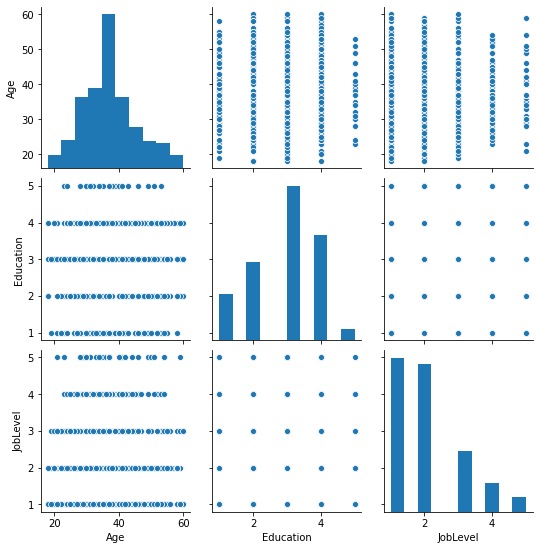

In [14]:
sb.pairplot(df[["Age", "Education", "JobLevel"]])
plt.show()

Education and job level of older employees is higer than the younger ones and there is not any considerable relation between education and job level.

KMeans - Cluster

In [15]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)


ValueError: could not convert string to float: 'No'

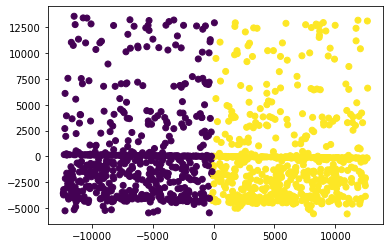

In [27]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
good_columns = df._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],c=labels)
plt.show()

In [19]:
kmeans_model.fit(df)

ValueError: could not convert string to float: 'No'

In [67]:
#Assessing data quality checks

# Looking for NaN
display(df.isnull().any())

Age                          True
Attrition                   False
BusinessTravel               True
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                    False
PercentSalaryHike           False
PerformanceRating            True
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance             False
YearsAtCompany

In [68]:
# 84% of employees stayed and 16% of employees left. 
# (Class Imbalance Problem)
df['Attrition'].value_counts(normalize=True)

No     0.836735
Yes    0.163265
Name: Attrition, dtype: float64

In [69]:
df['Over18'].value_counts()

Y    804
Name: Over18, dtype: int64

# Univariate Analysis

In [70]:
# Display the statistical overview of the employees
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


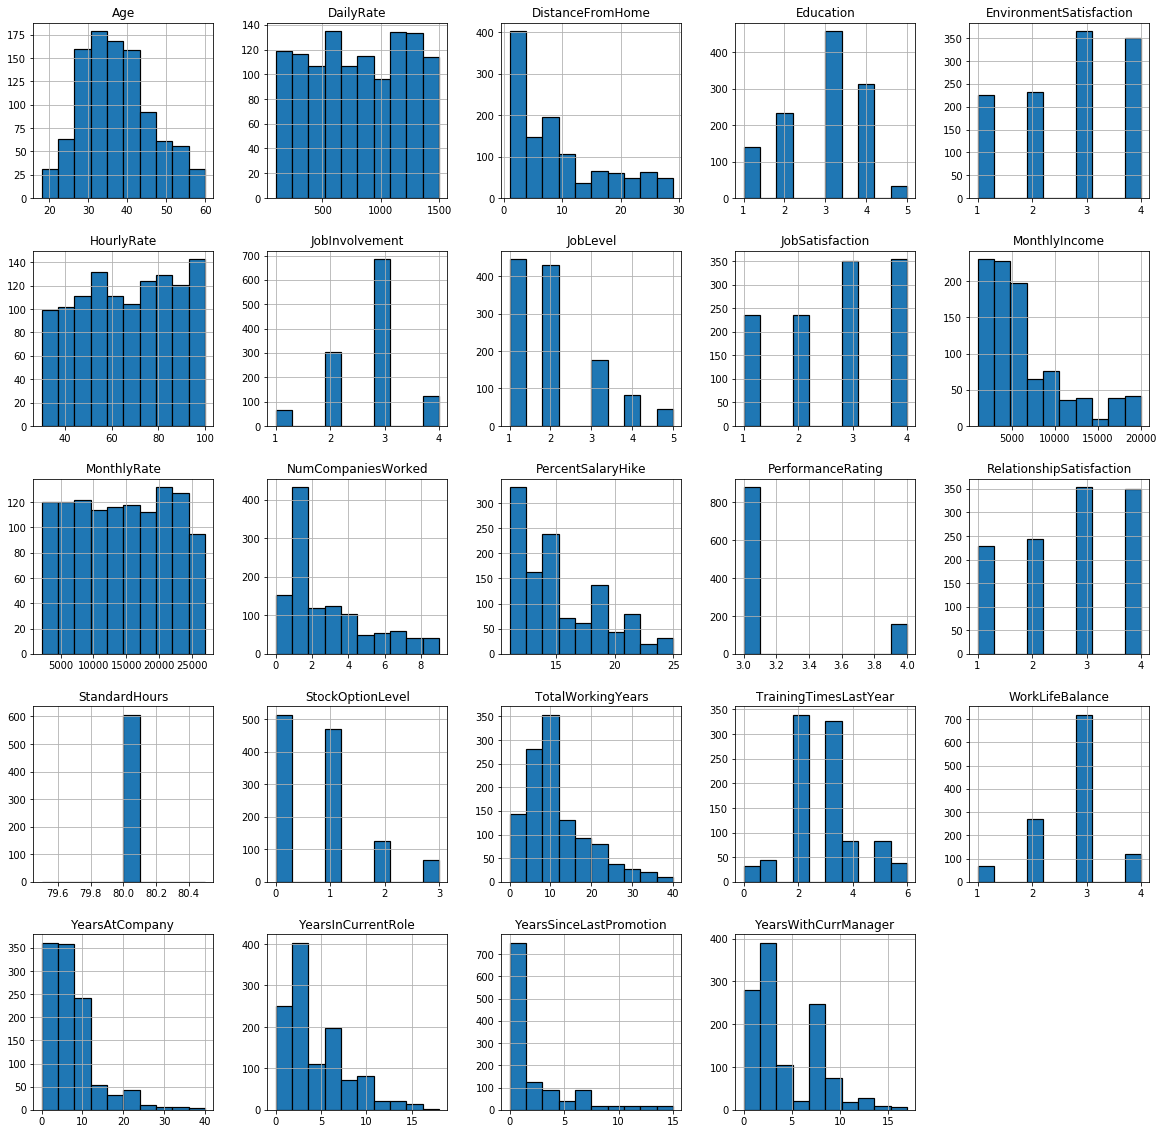

In [71]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

,Attrition_numerical,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition_numerical,1.000000,-0.024467,-0.057857,0.063296,-0.028971,-0.110908,0.001991,-0.138904,-0.172311,-0.108350,...,-0.060808,NaN,-0.144273,-0.172216,-0.027174,-0.075237,0.016580,-0.175432,-0.055546,-0.171122
Age,-0.024467,1.000000,-0.027961,0.008081,0.005951,0.026259,0.045007,0.005358,0.040556,-0.056664,...,0.028624,NaN,0.033101,0.023891,-0.017973,0.011215,0.330892,0.039994,0.006215,0.012462
DailyRate,-0.057857,-0.027961,1.000000,0.014447,-0.014759,0.047369,0.007709,0.049508,-0.009872,0.044478,...,0.002869,NaN,0.040397,0.015554,-0.018077,-0.046024,-0.016744,0.004506,-0.032954,-0.015054
DistanceFromHome,0.063296,0.008081,0.014447,1.000000,0.021564,0.000980,0.037306,-0.009932,0.020217,0.004533,...,0.013618,NaN,0.072908,0.008690,-0.006520,-0.026830,0.044862,0.014401,0.004995,0.006839
Education,-0.028971,0.005951,-0.014759,0.021564,1.000000,-0.054301,0.007589,0.039782,0.086789,-0.036841,...,0.004234,NaN,0.001485,0.140639,-0.006407,0.025790,0.022576,0.053092,0.032377,0.066882
EnvironmentSatisfaction,-0.110908,0.026259,0.047369,0.000980,-0.054301,1.000000,-0.043890,-0.007997,0.036607,-0.015897,...,0.016884,NaN,0.020726,0.030425,-0.008389,0.034762,-0.016126,0.030739,0.036111,0.014774
HourlyRate,0.001991,0.045007,0.007709,0.037306,0.007589,-0.043890,1.000000,0.032840,-0.043203,-0.088872,...,0.004297,NaN,0.026602,-0.017562,-0.013365,-0.015012,0.007165,-0.027806,-0.038817,-0.025352
JobInvolvement,-0.138904,0.005358,0.049508,-0.009932,0.039782,-0.007997,0.032840,1.000000,-0.022649,-0.025413,...,0.054873,NaN,0.042657,-0.022687,-0.023995,-0.026684,-0.028960,0.002518,-0.032253,0.022631
JobLevel,-0.172311,0.040556,-0.009872,0.020217,0.086789,0.036607,-0.043203,-0.022649,1.000000,-0.007627,...,-0.009148,NaN,0.003197,0.774492,-0.001041,0.031580,0.014837,0.402092,0.348876,0.391790
JobSatisfaction,-0.108350,-0.056664,0.044478,0.004533,-0.036841,-0.015897,-0.088872,-0.025413,-0.007627,1.000000,...,-0.024167,NaN,-0.011700,-0.025719,0.041760,-0.032101,-0.012542,0.002989,-0.034122,-0.032654


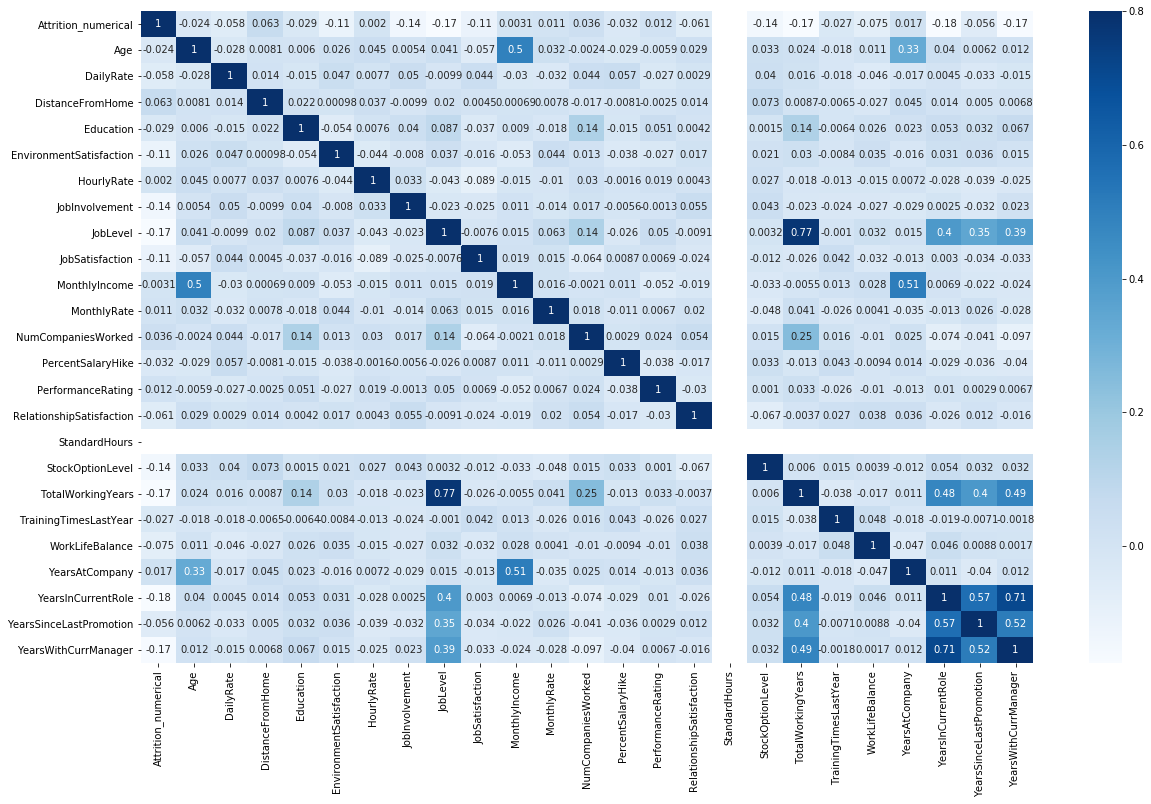

In [93]:
#Correlation Matrix
corr = df.corr()

corr_matrix = df.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix,vmax=0.8,cmap='Blues', annot=True)
corr

#Most of the features given in this dataset are poorly correlated to each other, 
#with the exception of YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion , Y
#earsWithCurrManager and TotalWorkingYears.

In [73]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,80.0,0,20,2.0,2,8.0,7,2,13,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,80.0,1,21,3.0,3,1.0,8,1,6,0
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,NaN,1,7,4.0,3,1.0,5,1,2,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,NaN,0,12,1.0,3,3.0,7,0,7,0
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,80.0,0,2,NaN,3,10.0,2,2,1,0


Text(0, 0.5, 'Employee Count')

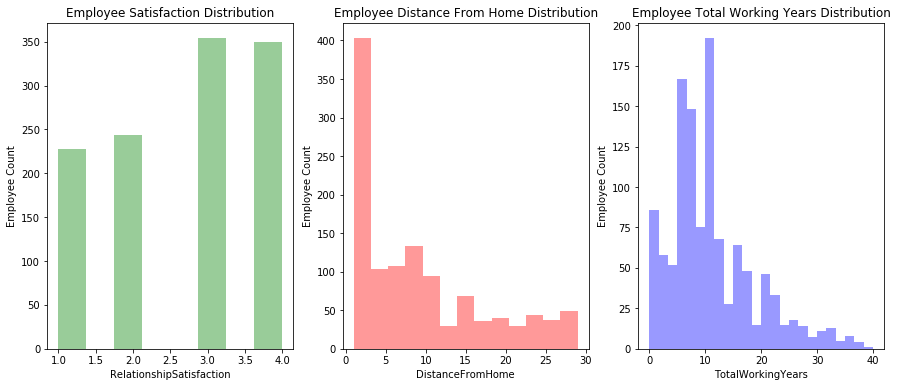

In [74]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Relationship Satisfaction
sb.distplot(df['RelationshipSatisfaction'], kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Distance From Home
sb.distplot(df['DistanceFromHome'], kde=False, color="r", ax=axes[1]).set_title('Employee Distance From Home Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Total Working Years
sb.distplot(df['TotalWorkingYears'], kde=False, color="b", ax=axes[2]).set_title('Employee Total Working Years Distribution')
axes[2].set_ylabel('Employee Count')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

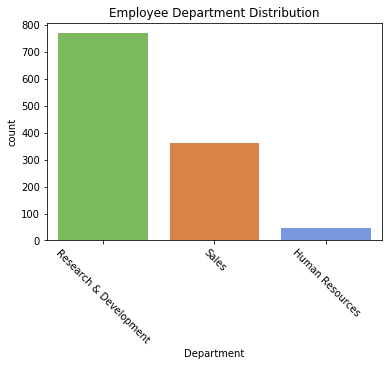

In [75]:
# Employee department
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sb.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

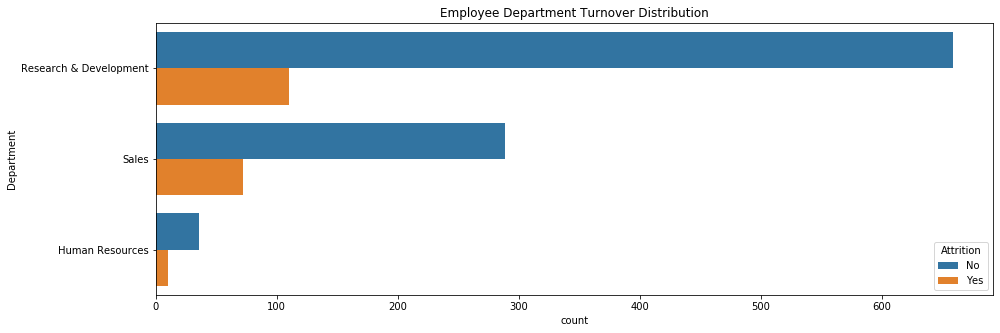

In [76]:
# Department VS Attrition
f, ax = plt.subplots(figsize=(15, 5))
sb.countplot(y="Department", hue='Attrition', data=df).set_title('Employee Department Turnover Distribution');

Text(0.5, 1.0, 'Employee Job Involvment Distribution - Attrition V.S. No Attrition')

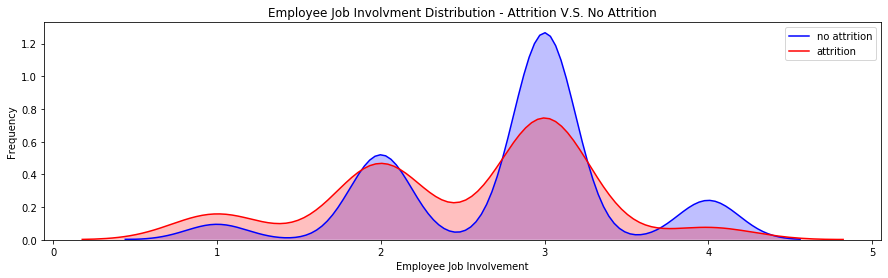

In [78]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4))
ax=sb.kdeplot(df.loc[(df['Attrition_numerical'] == 0),'JobInvolvement'] , color='b',shade=True,label='no attrition')
ax=sb.kdeplot(df.loc[(df['Attrition_numerical'] == 1),'JobInvolvement'] , color='r',shade=True, label='attrition')
ax.set(xlabel='Employee Job Involvement', ylabel='Frequency')
plt.title('Employee Job Involvment Distribution - Attrition V.S. No Attrition')

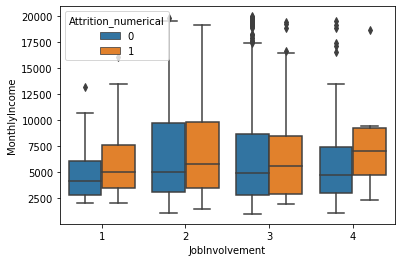

In [79]:
# ???? ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

sb.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition_numerical", data=df)

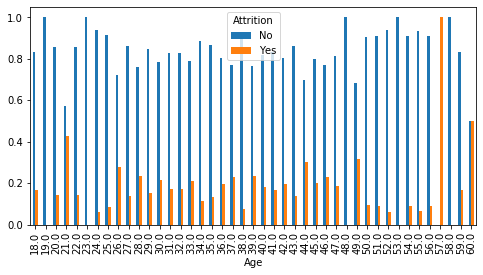

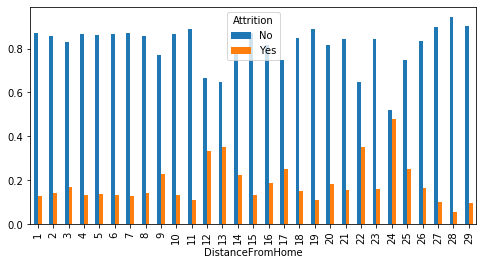

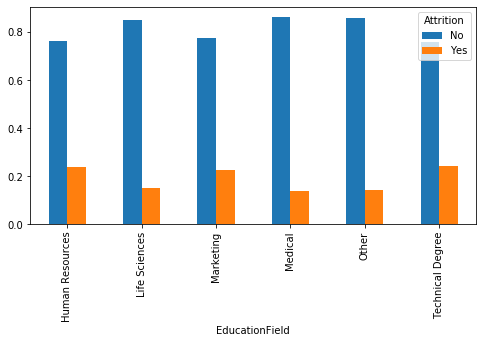

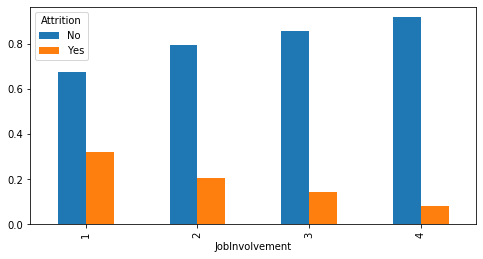

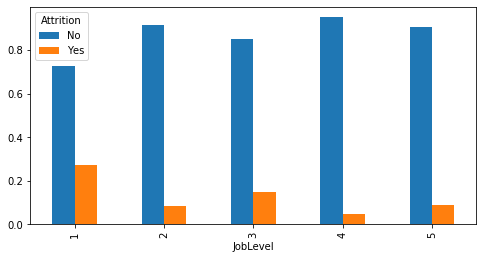

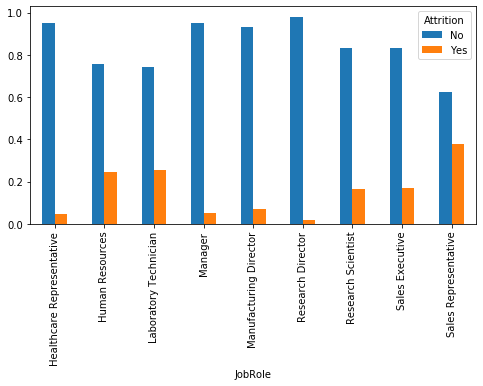

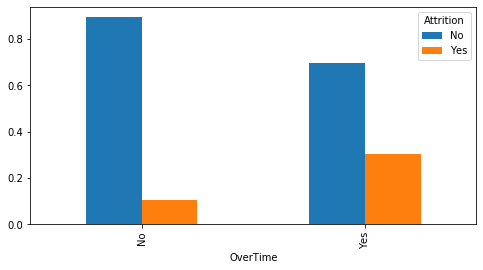

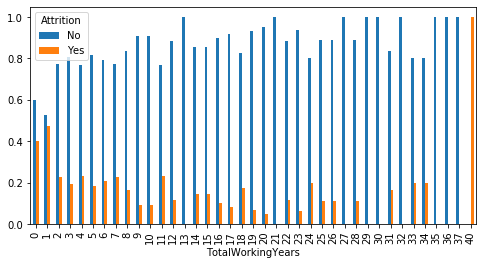

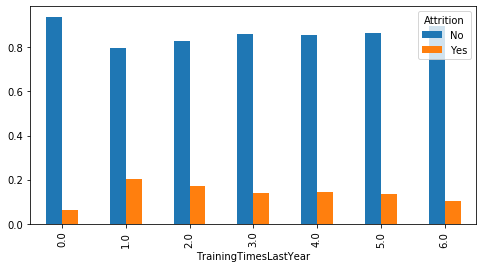

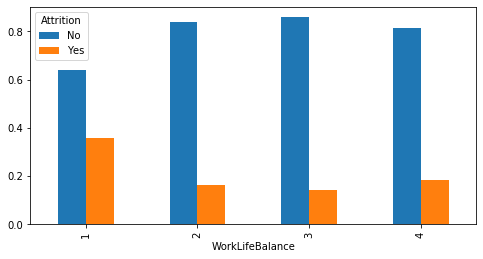

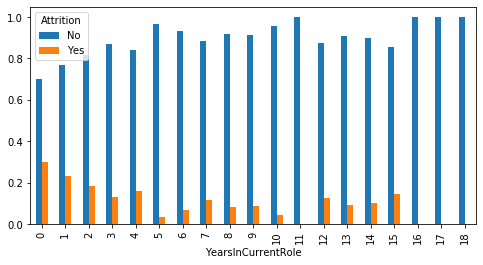

In [80]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)
    
for col in BarPlot_columns:
    Bar_plots(col)

In [81]:
# We can drop this column as it does not help in model building (it's a fixed number)
df["StandardHours"].value_counts()

80.0    606
Name: StandardHours, dtype: int64

In [82]:
categorical_df=df.select_dtypes(exclude=np.number)
categorical_cols=list(categorical_df.columns)
for n in categorical_cols:
    print(pd.crosstab(df['Attrition'],df[n],normalize='columns'))
    print("====================================")

Attrition   No  Yes
Attrition          
No         1.0  0.0
Yes        0.0  1.0
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                0.840708           0.833333       0.848168
Yes               0.159292           0.166667       0.151832
Department  Human Resources  Research & Development     Sales
Attrition                                                    
No                 0.782609                0.856957  0.800554
Yes                0.217391                0.143043  0.199446
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
No                     0.761905       0.850716      0.776  0.862162  0.859375   
Yes                    0.238095       0.149284      0.224  0.137838  0.140625   

EducationField  Technical Degree  
Attrition                         
No                      0.757009 

In [83]:
# Move the reponse variable "Attrition" to the front of the table
front = df['Attrition']
df.drop(labels=['Attrition'], axis=1,inplace = True)
df.insert(0, 'Attrition', front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,No,52.0,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,80.0,0,20,2.0,2,8.0,7,2,13,0
1,No,36.0,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,80.0,1,21,3.0,3,1.0,8,1,6,0
2,No,NaN,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,NaN,1,7,4.0,3,1.0,5,1,2,0
3,No,33.0,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,NaN,0,12,1.0,3,3.0,7,0,7,0
4,No,NaN,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,80.0,0,2,NaN,3,10.0,2,2,1,0


In [84]:
# Move the reponse variable "Attrition" to the front of the table
front = df['Attrition_numerical']
df.drop(labels=['Attrition_numerical'], axis=1,inplace = True)
df.insert(1, 'Attrition_numerical', front)
df.head()

,Attrition,Attrition_numerical,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,0,52.0,Travel_Rarely,593,Research & Development,9,4,Medical,2,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,No,0,36.0,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,No,0,NaN,Travel_Frequently,530,Sales,16,3,Life Sciences,3,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,No,0,33.0,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,No,0,NaN,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [85]:
# Overview of summary (Turnover V.S. Non-turnover)
attrition_summary = df.groupby('Attrition_numerical')
attrition_summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition_numerical,,,,,,,,,,,,,,,,,,,,,
0,37.297719,814.039634,8.983740,2.897358,2.769309,66.281504,2.779472,2.102642,2.755081,6559.499380,...,2.731707,80.0,0.837398,11.604675,2.841646,2.779472,6.882604,4.470528,2.250000,4.380081
1,36.706587,750.406250,10.369792,2.817708,2.442708,66.390625,2.510417,1.604167,2.432292,6599.294872,...,2.552083,80.0,0.505208,8.020833,2.744681,2.635417,7.156425,2.744792,1.770833,2.713542


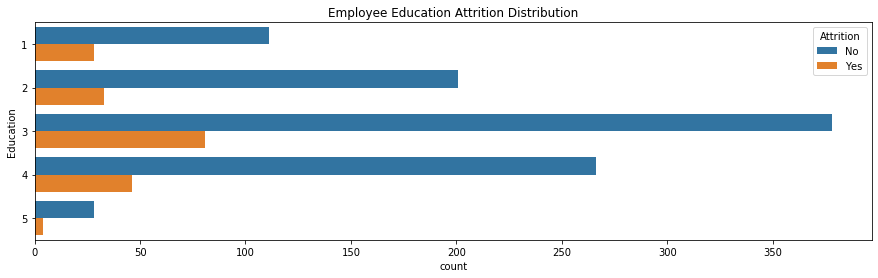

In [86]:
f, ax = plt.subplots(figsize=(15, 4))
sb.countplot(y="Education", hue='Attrition', data=df).set_title('Employee Education Attrition Distribution');

59.44494180841539

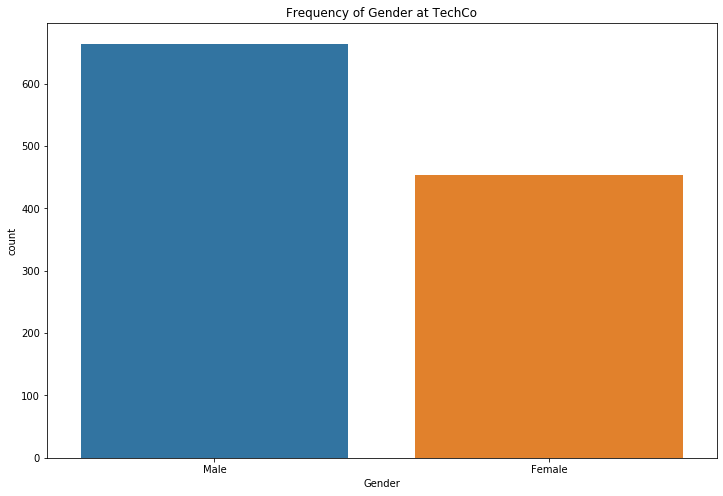

In [87]:
plt.figure(figsize=(12,8))
sb.countplot(x="Gender", data=df)
# Proportion of males
plt.title('Frequency of Gender at TechCo')
df['Gender'].value_counts().Male/df['Gender'].count()*100

#Clearly there's a gender imbalance (59% Male / 41% Female)

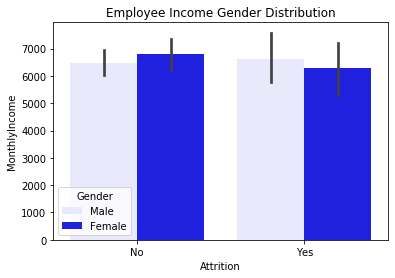

<Figure size 720x720 with 0 Axes>

In [88]:
sb.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,color='blue').set_title('Employee Income Gender Distribution')
plt.figure(figsize=(10, 10))
plt.show()

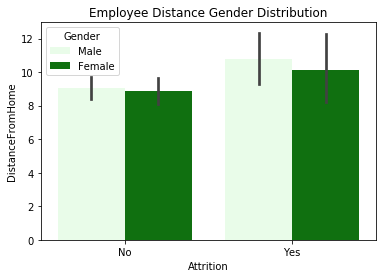

In [89]:
sb.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='green').set_title('Employee Distance Gender Distribution')
plt.show()

<Figure size 1080x1080 with 0 Axes>

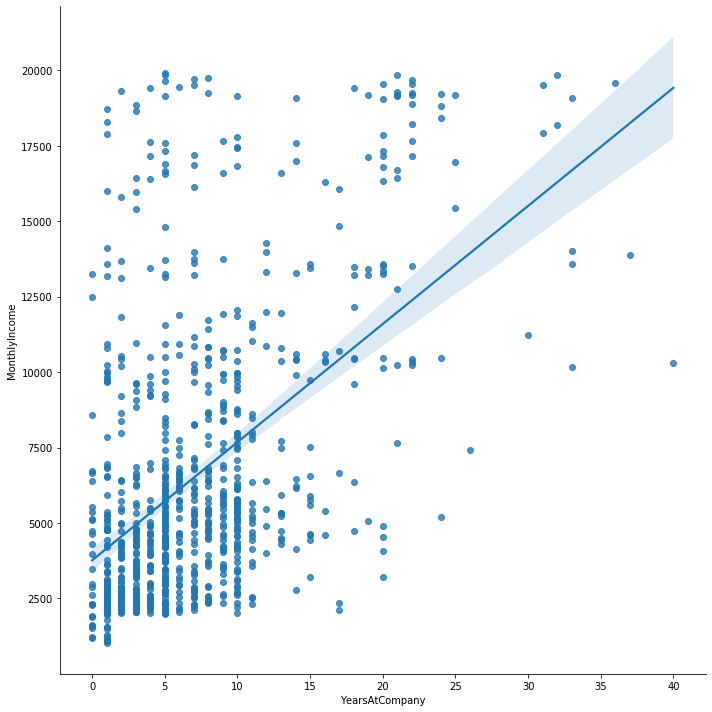

In [90]:
plt.figure(figsize=(15,15))
sb.lmplot("YearsAtCompany", "MonthlyIncome", data=df, height=10) 

Text(0.5, 1.0, 'OverTime')

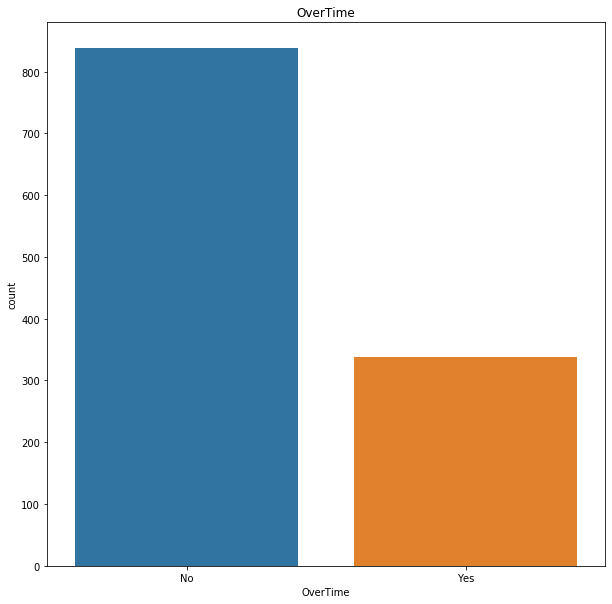

In [91]:
sb.countplot(data['OverTime'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('OverTime')

Text(0.5, 1.0, 'Marital Status')

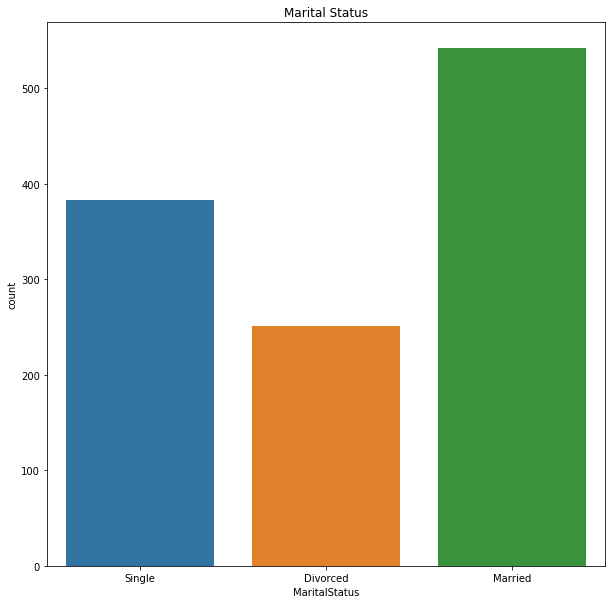

In [92]:
sb.countplot(data['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Marital Status')
